In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%pwd

'/content'

In [ ]:
%cd /content/drive/MyDrive/SECOND_PROJECT/CLUSTERING_FEATURES

[Errno 2] No such file or directory: '/content/drive/MyDrive/SECOND_PROJECT/CLUSTERING_FEATURES'
/content


In [ ]:
%pwd

'/content'

## 전처리

In [ ]:
import pandas as pd

store_list = pd.read_csv('/content/drive/MyDrive/과제3/final_store_list.csv').iloc[:, 1:]
store_list

,점포코드,시군구
0,A1,서대문구
1,A12,강남구
2,A2,송파구
3,A20,노원구
4,A24,강북구
...,...,...
158,D4,강북구
159,D5,강남구
160,D6,강북구
161,D7,성동구


## 감소 & 증가

In [ ]:
decrease_df = pd.read_csv('/content/drive/MyDrive/과제3/decrease.csv').iloc[:, 1:]  # 86
decrease_df = pd.merge(decrease_df, store_list, on = '점포코드')
decrease_df

,점포코드,Y_y,predict,시군구
0,A1,1,0,서대문구
1,A12,1,0,강남구
2,A2,1,0,송파구
3,A20,1,0,노원구
4,A24,1,0,강북구
...,...,...,...,...
81,D12,1,0,송파구
82,D2,0,0,마포구
83,D4,0,0,강북구
84,D5,0,0,강남구


In [ ]:
increase_df = pd.read_csv('/content/drive/MyDrive/과제3/increase.csv').iloc[:, 1:]  # 86
increase_df = pd.merge(increase_df, store_list, on = '점포코드')
increase_df

,점포코드,Y_y,predict,시군구
0,B11,1,1,동대문구
1,B3,1,1,영등포구
2,B4,0,1,도봉구
3,B6,0,1,광진구
4,B9,0,1,서대문구
...,...,...,...,...
72,D10,1,1,노원구
73,D11,1,1,광진구
74,D3,1,1,송파구
75,D6,1,1,강북구


## 소리 감소& 증가

In [ ]:
# sori
sori_temp = pd.read_csv('/content/drive/MyDrive/과제3/소리_5등급화함(1) (1).csv')
sori_temp.columns = ['점포코드', '시군구', '1인가구수', '단지', '종합', '아파트']
sori_dec = pd.merge(decrease_df, sori_temp, on = ['점포코드', '시군구'])
sori_dec

,점포코드,Y_y,predict,시군구,1인가구수,단지,종합,아파트
0,A1,1,0,서대문구,3,4,2,2
1,A12,1,0,강남구,2,1,5,5
2,A2,1,0,송파구,2,2,3,3
3,A20,1,0,노원구,3,1,4,3
4,A24,1,0,강북구,4,4,1,1
...,...,...,...,...,...,...,...,...
81,D12,1,0,송파구,2,2,3,3
82,D2,0,0,마포구,2,2,3,2
83,D4,0,0,강북구,4,4,1,1
84,D5,0,0,강남구,2,1,5,5


In [ ]:
# sori
sori_temp = pd.read_csv('/content/drive/MyDrive/과제3/소리_5등급화함(1) (1).csv')
sori_temp.columns = ['점포코드', '시군구', '1인가구수', '단지', '종합', '아파트']
sori_inc = pd.merge(increase_df, sori_temp, on = ['점포코드', '시군구'])
sori_inc

,점포코드,Y_y,predict,시군구,1인가구수,단지,종합,아파트
0,B11,1,1,동대문구,2,3,2,3
1,B3,1,1,영등포구,3,2,3,3
2,B4,0,1,도봉구,4,3,2,2
3,B6,0,1,광진구,2,4,2,3
4,B9,0,1,서대문구,3,4,2,2
...,...,...,...,...,...,...,...,...
72,D10,1,1,노원구,3,1,4,3
73,D11,1,1,광진구,2,4,2,3
74,D3,1,1,송파구,2,2,3,3
75,D6,1,1,강북구,4,4,1,1


In [ ]:
import numpy as np

inc_f = np.array(sori_inc.iloc[:, 4:])
dec_f = np.array(sori_dec.iloc[:, 4:])

In [ ]:
inc_f

### 군집화 inc_f

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers= ['o','s','^','1','2','3','4','<','>','D','d','h','H']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

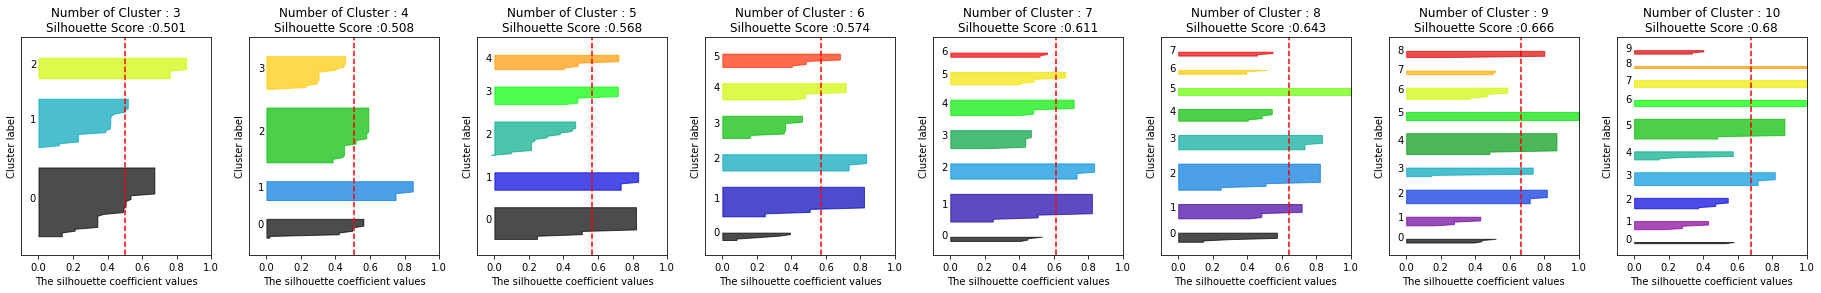

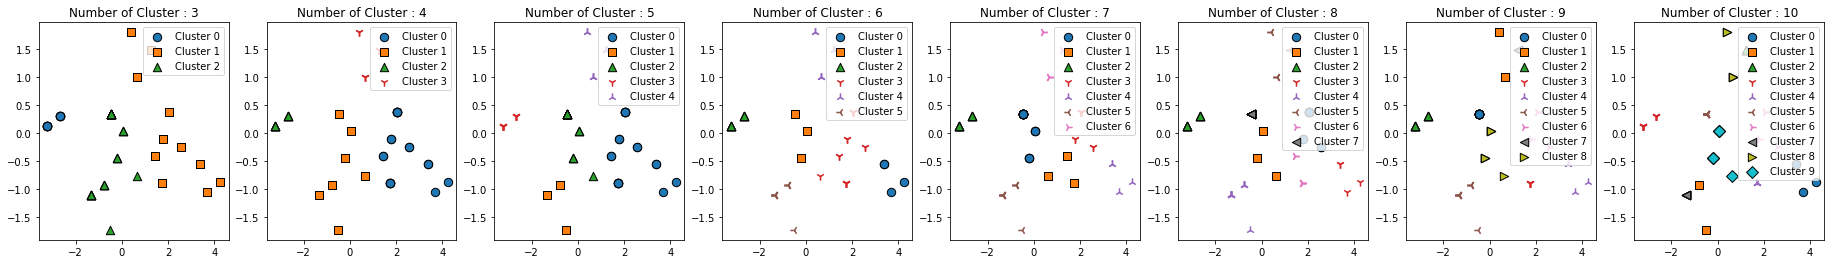

In [ ]:
import matplotlib.pyplot as plt

visualize_silhouette([3, 4, 5, 6, 7, 8, 9, 10] ,inc_f )
visualize_kmeans_plot_multi([3, 4, 5, 6, 7, 8, 9, 10], inc_f )

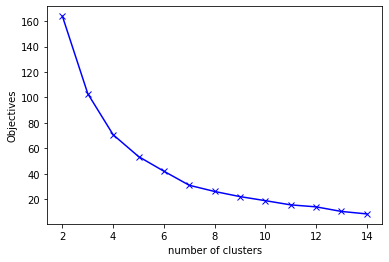

In [ ]:
from sklearn.cluster import KMeans

Objectives = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(inc_f)
    Objectives.append(km.inertia_)

plt.plot(K, Objectives, 'bx-')
plt.xlabel('k')
plt.ylabel('Objectives')
plt.xlabel('number of clusters')
plt.show() 

In [ ]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

df_kmean_4 = inc_f.copy()

kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, random_state = 0)
kmeans.fit(df_kmean_4)
kmeans.labels_

array([0, 2, 3, 0, 3, 1, 2, 2, 0, 2, 2, 2, 2, 3, 3, 2, 2, 3, 3, 1, 1, 1,
       3, 2, 3, 1, 2, 0, 3, 2, 1, 3, 3, 2, 2, 2, 1, 2, 3, 2, 1, 2, 1, 0,
       2, 3, 3, 2, 3, 1, 2, 2, 0, 2, 1, 0, 0, 2, 0, 0, 2, 2, 2, 2, 3, 2,
       0, 2, 2, 3, 1, 3, 2, 0, 2, 3, 3], dtype=int32)

In [ ]:
sori_inc['cluster_label'] = kmeans.labels_
sori_inc

,점포코드,Y_y,predict,시군구,1인가구수,단지,종합,아파트,cluster_label
0,B11,1,1,동대문구,2,3,2,3,0
1,B3,1,1,영등포구,3,2,3,3,2
2,B4,0,1,도봉구,4,3,2,2,3
3,B6,0,1,광진구,2,4,2,3,0
4,B9,0,1,서대문구,3,4,2,2,3
...,...,...,...,...,...,...,...,...,...
72,D10,1,1,노원구,3,1,4,3,2
73,D11,1,1,광진구,2,4,2,3,0
74,D3,1,1,송파구,2,2,3,3,2
75,D6,1,1,강북구,4,4,1,1,3


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree

## getting X, y values
X = inc_f
y = np.array(sori_inc.iloc[:, 4:-1])

## initiating DecisionTreeClassifer method
dt_clf = DecisionTreeClassifier(random_state = 1004)


## fitting a decision tree classifier
dt_clf_model = dt_clf.fit(X, y)

## feature importances
dt_clf_model.feature_importances_

array([0.26234977, 0.25392836, 0.30241891, 0.18130295])

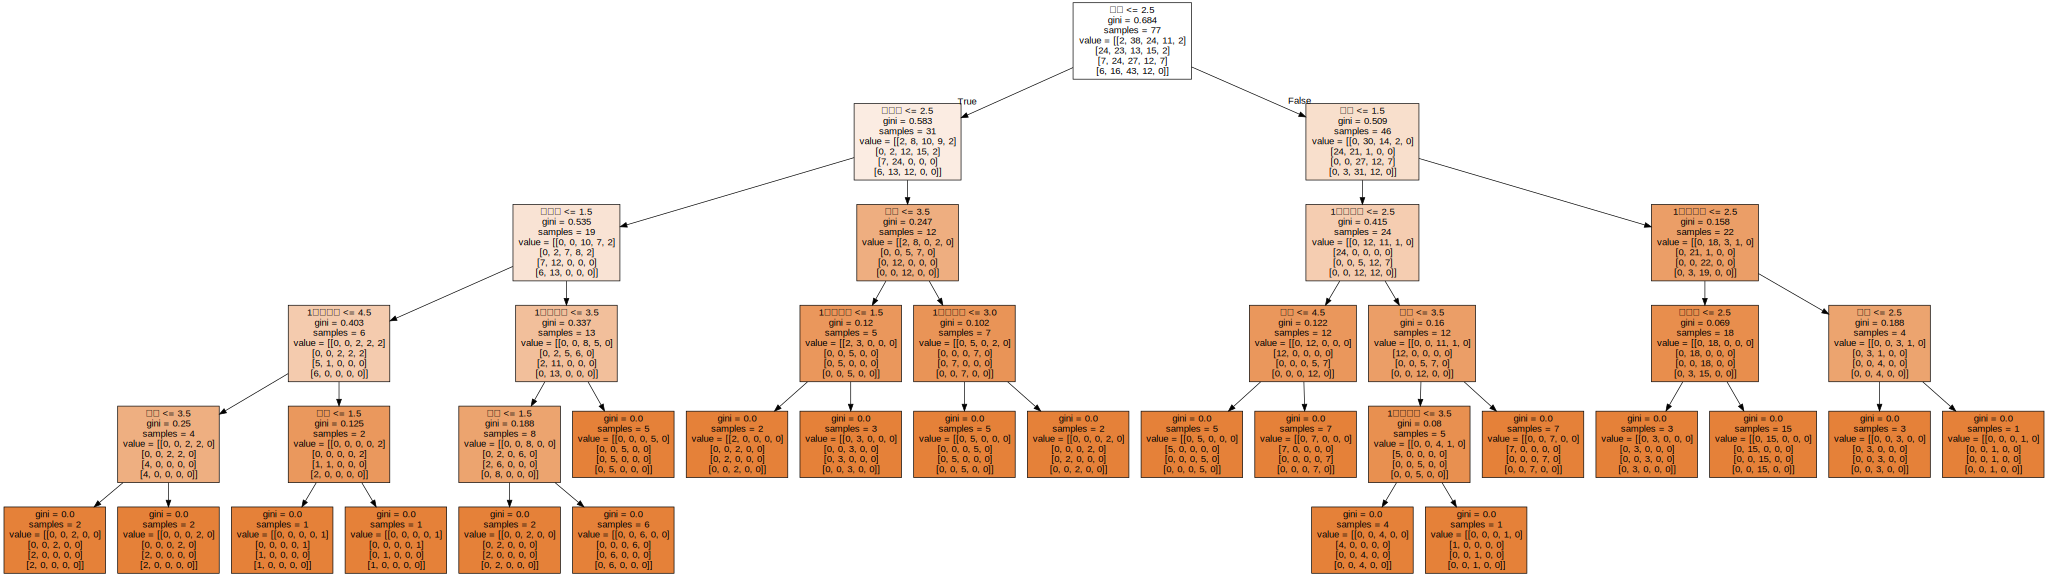

In [ ]:
## Visualizing Tree using Graphviz
from sklearn import tree
import graphviz

## exporting tree in DOT format
## refer to: https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
tree_dot = tree.export_graphviz(
    dt_clf_model, 
    feature_names=sori_inc.iloc[:, 4:-1].columns, 
    class_names=['0', '1', '2', '3'],
    filled=True
)


## draw graph using Graphviz
dt_graph = graphviz.Source(tree_dot, format='png')
dt_graph

### 군집화 dec_f

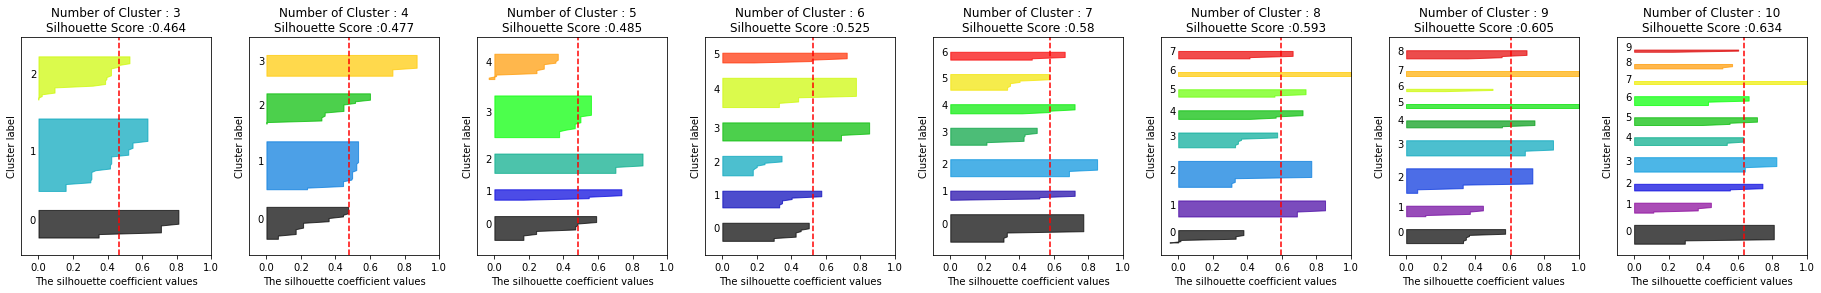

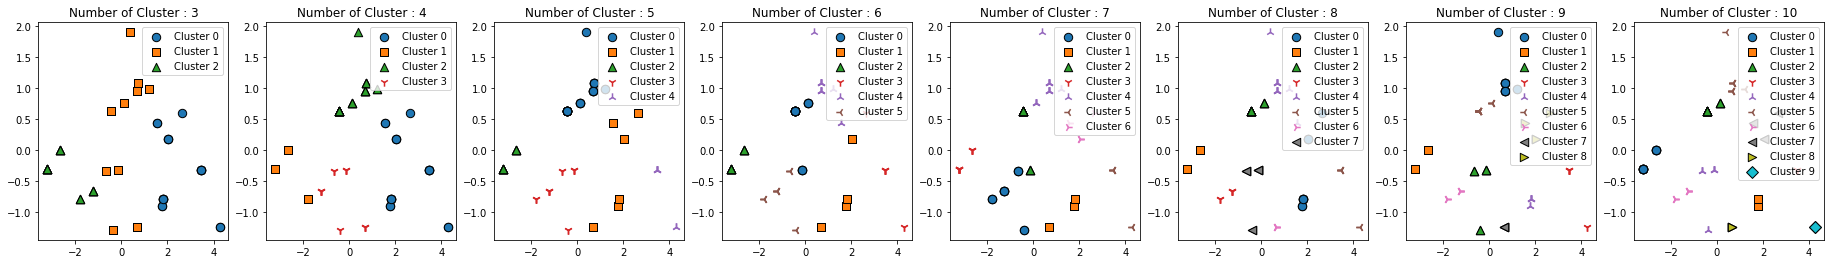

In [ ]:
import matplotlib.pyplot as plt

visualize_silhouette([3, 4, 5, 6, 7, 8, 9, 10], dec_f)
visualize_kmeans_plot_multi([3, 4, 5, 6, 7, 8, 9, 10], dec_f)

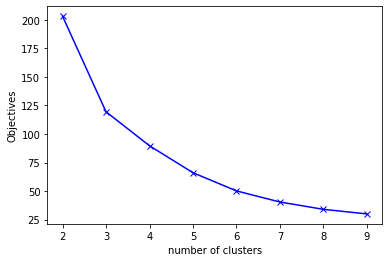

In [ ]:
from sklearn.cluster import KMeans

Objectives = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(dec_f)
    Objectives.append(km.inertia_)

plt.plot(K, Objectives, 'bx-')
plt.xlabel('k')
plt.ylabel('Objectives')
plt.xlabel('number of clusters')
plt.show() 

In [ ]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

df_kmean_3 = dec_f.copy()

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state = 0)
kmeans.fit(df_kmean_3)
kmeans.labels_

array([2, 0, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 2, 1,
       1, 1, 1, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1, 0, 2, 0, 2, 0, 2, 1, 2, 1,
       0, 0, 0, 0, 1, 1, 2, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 2],
      dtype=int32)

In [ ]:
sori_dec['cluster_label'] = kmeans.labels_
sori_dec

,점포코드,Y_y,predict,시군구,1인가구수,단지,종합,아파트,cluster_label
0,A1,1,0,서대문구,3,4,2,2,2
1,A12,1,0,강남구,2,1,5,5,0
2,A2,1,0,송파구,2,2,3,3,1
3,A20,1,0,노원구,3,1,4,3,1
4,A24,1,0,강북구,4,4,1,1,2
...,...,...,...,...,...,...,...,...,...
81,D12,1,0,송파구,2,2,3,3,1
82,D2,0,0,마포구,2,2,3,2,1
83,D4,0,0,강북구,4,4,1,1,2
84,D5,0,0,강남구,2,1,5,5,0


In [ ]:
sori_dec.iloc[:, 4:-1]

,1인가구수,단지,종합,아파트
0,3,4,2,2
1,2,1,5,5
2,2,2,3,3
3,3,1,4,3
4,4,4,1,1
...,...,...,...,...
81,2,2,3,3
82,2,2,3,2
83,4,4,1,1
84,2,1,5,5


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree

## getting X, y values
X = dec_f
Y = np.array(sori_dec.iloc[:, 4:-1])

## initiating DecisionTreeClassifer method
dt_clf = DecisionTreeClassifier(random_state = 1004)


## fitting a decision tree classifier
dt_clf_model = dt_clf.fit(X, Y)

## feature importances
dt_clf_model.feature_importances_

array([0.21227999, 0.08842002, 0.49750631, 0.20179368])

### Decision Tree

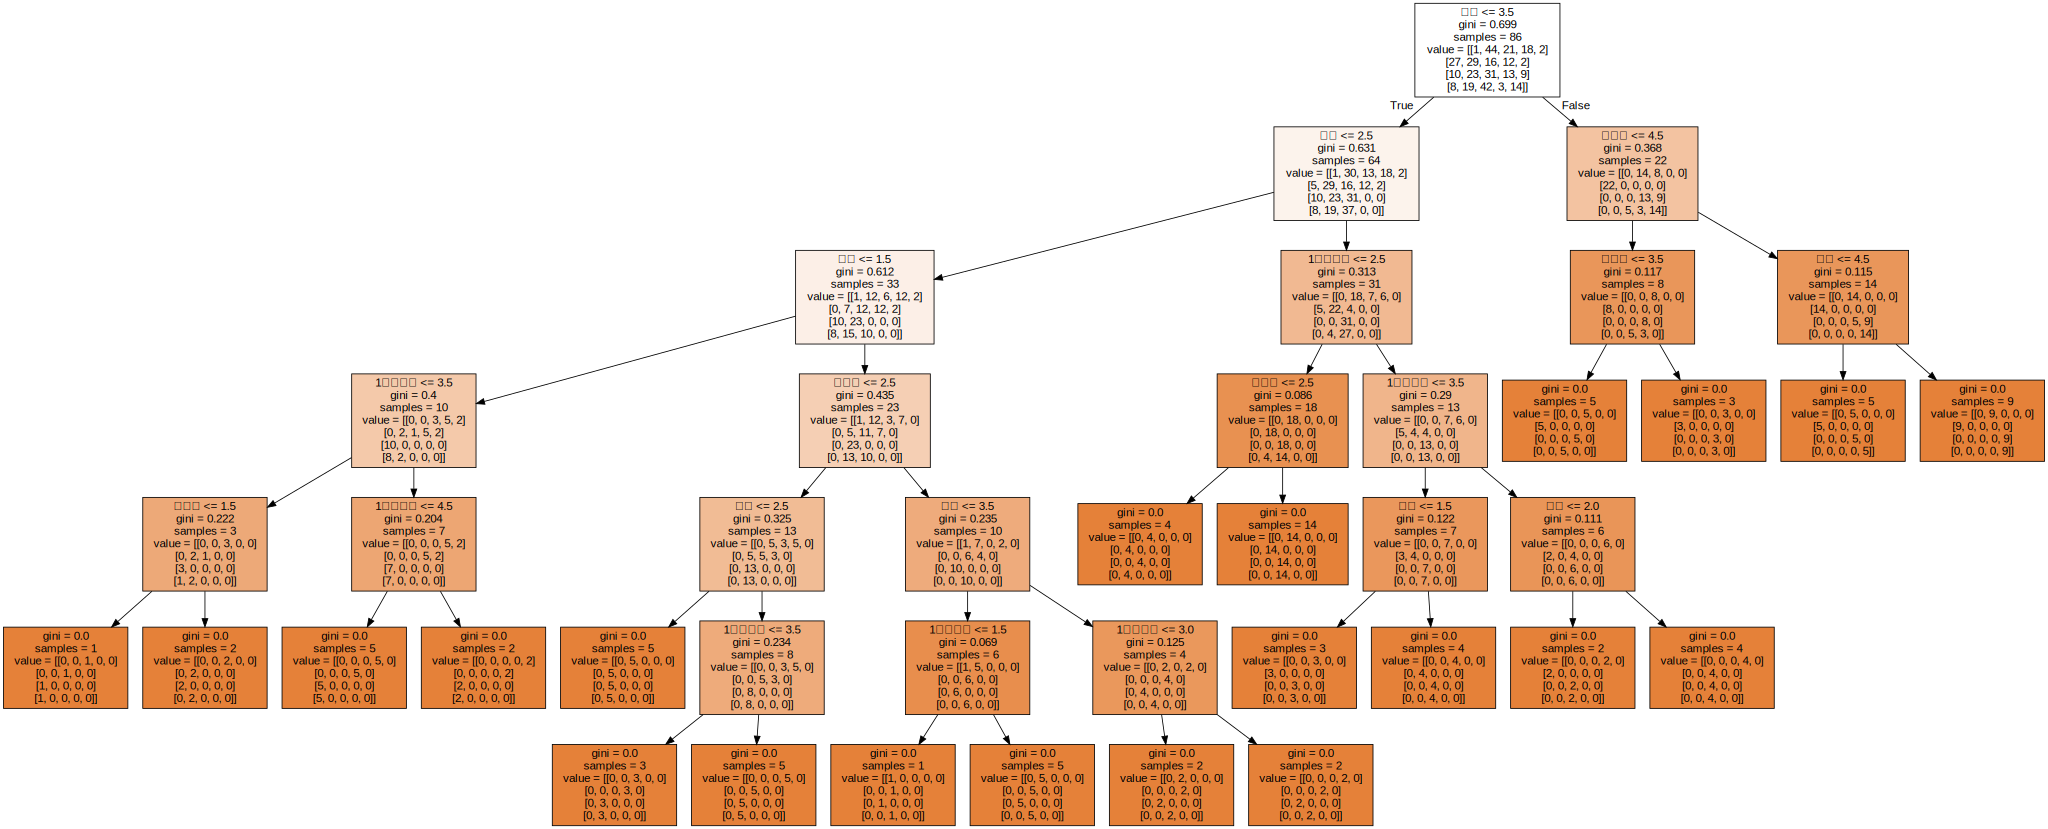

In [ ]:
## Visualizing Tree using Graphviz
from sklearn import tree
import graphviz

## exporting tree in DOT format
## refer to: https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
tree_dot = tree.export_graphviz(
    dt_clf_model, 
    feature_names=sori_dec.iloc[:, 4:-1].columns, 
    class_names=['0', '1', '2', '3'],
    filled=True
)


## draw graph using Graphviz
dt_graph = graphviz.Source(tree_dot, format='png')
dt_graph